In [1]:
# To be able to runt his code you will need Cython installed (sudo pip install Cython)
# and to run the command
# python setup_dtw.py build_ext --inplace
# To compile the Cython library
import subprocess
code = subprocess.call(['python', 'setup_dtw.py', 'build_ext', '--inplace'])
assert(code==0)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit

from dtw import dtw_std

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [3]:
def dtw_frac(*args,**kwargs):
    frac = kwargs.pop("frac", 0)
    kwargs['k'] = int(frac*max(len(args[0]),len(args[1])))
    return dtw_std(*args,**kwargs)

In [4]:
metrics = ['sqeuclidean','euclidean','cosine']
dtw_parameters = [
    {},
    {'constraint' : 'sakoe_chiba',  'frac' : 0.05},
    {'constraint' : 'sakoe_chiba',  'frac' : 0.1},
    {'constraint' : 'sakoe_chiba',  'frac' : 0.2},
    {'constraint' : 'slanted_band', 'frac' : 0.05},
    {'constraint' : 'slanted_band', 'frac' : 0.1},
    {'constraint' : 'slanted_band', 'frac' : 0.2},
    {'constraint' : 'itakura'},
]
labels = [
    'Unconstrained',
    'Sakoe Chiba 0.05',
    'Sakoe Chiba 0.1',
    'Sakoe Chiba 0.2',
    'Slanted Band 0.05',
    'Slanted Band 0.1',
    'Slanted Band 0.2',
    'Itakura Parallelogram'
]

In [5]:
lengths = np.array([100,200,500,1000,2000,5000])
y1 = [np.sin(2*np.pi*np.linspace(0,3,N)) for N in lengths]
y2 = [-0.15*np.cos(3*2*np.pi*np.linspace(0,3,N))+np.cos(2*np.pi*np.linspace(0,3,N)) for N in lengths]

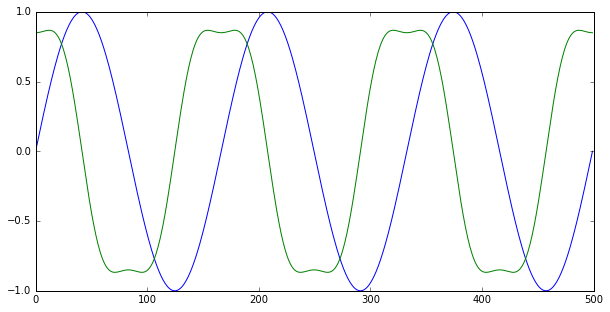

In [6]:
u,v = y1[2],y2[2]
plt.plot(u)
plt.plot(v)

57.678493179493444


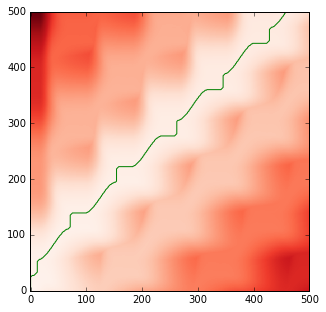

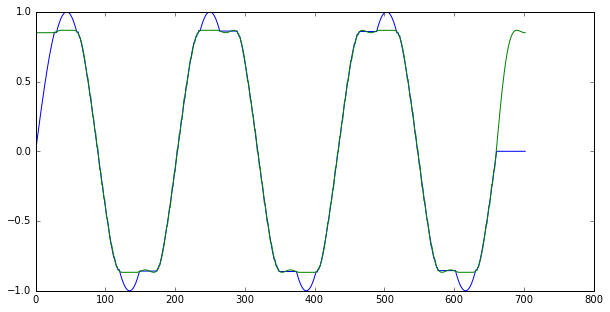

In [7]:
dist, cost_matrix, (alig_u, alig_v) = dtw_std(u,v,dist_only=False)
print(dist)
plt.plot(alig_v, alig_u,color='g')
plt.imshow(cost_matrix, origin='lower', cmap=plt.cm.Reds, interpolation='nearest')
plt.figure()

plt.plot(u[alig_u])
plt.plot(v[alig_v])

57.678493179493444


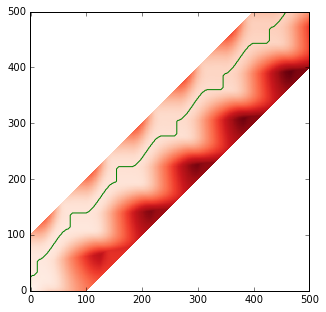

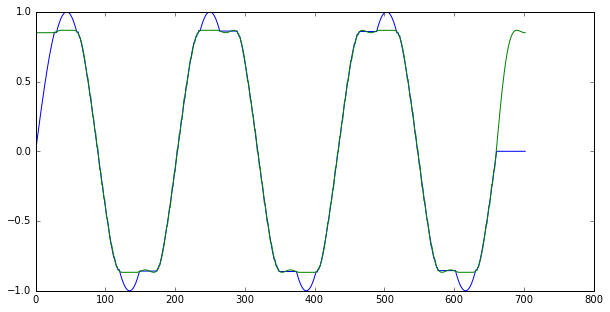

In [8]:
dist, cost_matrix, (alig_u, alig_v) = dtw_frac(u,v,dist_only=False,constraint='sakoe_chiba',frac=0.2)
print(dist)
plt.plot(alig_v, alig_u,color='g')
plt.imshow(cost_matrix, origin='lower', cmap=plt.cm.Reds, interpolation='nearest')
plt.figure()

plt.plot(u[alig_u])
plt.plot(v[alig_v])

85.41457669394255


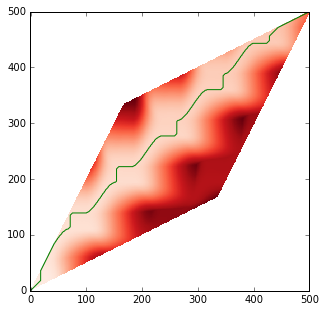

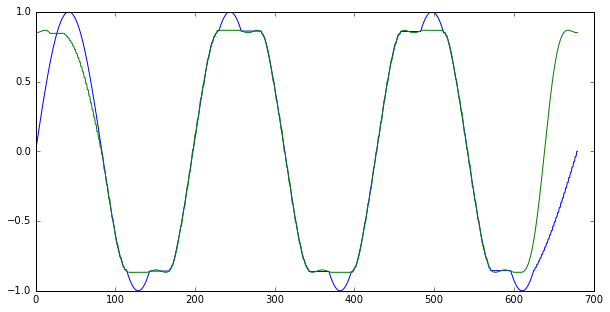

In [9]:
dist, cost_matrix, (alig_u, alig_v) = dtw_std(u,v,dist_only=False,constraint='itakura')
print(dist)
plt.plot(alig_v, alig_u,color='g')
plt.imshow(cost_matrix, origin='lower', cmap=plt.cm.Reds, interpolation='nearest')
plt.figure()

plt.plot(u[alig_u])
plt.plot(v[alig_v])

In [10]:
it = 10
x = np.arange(len(lengths))
times = np.zeros([len(lengths),len(labels)])
for i,label,kwargs in zip(range(len(labels)),labels,dtw_parameters):
    times[:,i] = np.array([timeit.Timer("dtw_frac(y1[%d],y2[%d],**kwargs)" % (i,i), \
                           setup="from __main__ import dtw_frac,y1,y2,kwargs").timeit(number=it)/it \
                           for i,_ in enumerate(y1)])


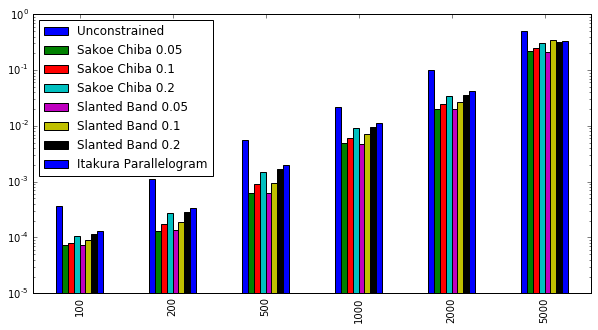

In [11]:
df_times = pd.DataFrame(times,columns=labels,index=lengths)
df_times.plot.bar(logy=True)